In [2]:
#
# load libraries
# -----------
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, f1_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier

#!pip install xgboost
import xgboost as xgb

# There are a few warnings that will appear that will not affect your analysis. Run this code to ignore. 
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Make sure to import other libraries that will be necessary for training models!

In [3]:
#
# read in "Inspections Data 2011-2013" csv data
# -----------
chicago_inspections_2011_to_2013 = pd.read_csv("data/Chicago Inspections 2011-2013.csv", 
                                              low_memory=False)

#
# read in  "Inspections Data 2014_updated" csv data
# -----------
chicago_inspections_2014 = pd.read_csv("data/Chicago Inspections 2014_updated.csv",  # be sure to use the "updated" data here
                                      low_memory=False)

In [5]:
# look at the inspections data
chicago_inspections_2011_to_2013.head(15)

,Inspection_ID,Inspection_Date,DBA_Name,AKA_Name,License,Facility_Type,Risk,Address,City,State,Zip,Inspection_Type,Results,Latitude,Longitude,Location,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pass_flag,fail_flag,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,ID,LICENSE_ID,ACCOUNT_NUMBER,LEGAL_NAME,DOING_BUSINESS_AS_NAME,ADDRESS,CITY,STATE,ZIP_CODE,WARD,PRECINCT,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_CODE,LICENSE_DESCRIPTION,BUSINESS_ACTIVITY_ID,BUSINESS_ACTIVITY,LICENSE_NUMBER,APPLICATION_TYPE,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE,LICENSE_STATUS,LATITUDE,LONGITUDE,minDate,maxDate,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound
0,269961,2013-01-31,SEVEN STAR,SEVEN STAR,30790,Grocery Store,Risk 3 (Low),3352 N BROADWAY,CHICAGO,IL,60657.0,Canvass,Pass,41.943359,-87.644999,"(41.943359344775146, -87.64499875300952)",Other,0,0,2,1,0,0,0,0,0,2.0,1,30790-20110416,2081412.0,63759.0,VIRGINIA DELA ROSA,SEVEN STAR,3352 N BROADWAY 1,CHICAGO,IL,60657.0,44.0,33.0,44-33,19.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,30790.0,RENEW,2011-04-16,2013-04-15,AAI,41.943359,-87.644999,2002-02-16,2015-04-15,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0
1,507211,2011-10-18,PANERA BREAD,PANERA BREAD,1475890,Restaurant,Risk 1 (High),6059 N LINCOLN AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.991919,-87.709631,"(41.99191947239194, -87.70963133440333)",Restaurant,0,0,3,1,0,0,0,0,0,2.0,1,1475890-20110416,2081695.0,207283.0,"PANERA, LLC",PANERA BREAD,6059 N LINCOLN AVE C,CHICAGO,IL,60659.0,50.0,23.0,50-23,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1475890.0,RENEW,2011-04-16,2013-04-15,AAI,41.991919,-87.709631,2004-05-05,2019-04-15,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0
2,507212,2011-10-18,LITTLE QUIAPO RESTAURANT,LITTLE QUIAPO RESTAURANT,1740130,Restaurant,Risk 1 (High),6259 N MCCORMICK RD,CHICAGO,IL,60659.0,Canvass,Fail,41.995632,-87.712707,"(41.99563177556418, -87.71270678169132)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1740130-20110216,2070145.0,3107.0,ENELITA GARCIA,LITTLE QUIAPO RESTAURANT,6259 N MCCORMICK RD,CHICAGO,IL,60659.0,50.0,25.0,50-25,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1740130.0,RENEW,2011-02-16,2013-02-15,AAI,41.995632,-87.712707,2007-03-22,2017-02-15,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0
3,507216,2011-10-19,SERGIO'S TAQUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA,1447363,Restaurant,Risk 1 (High),3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.982933,-87.710982,"(41.982933189164974, -87.71098225381141)",Restaurant,0,0,6,1,0,0,0,0,0,2.0,1,1447363-20110216,2071895.0,270993.0,SERGIO'S TAZUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA INC.,3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,39.0,48.0,39-48,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1447363.0,RENEW,2011-02-16,2013-02-15,AAI,41.982933,-87.710982,2003-12-31,2019-02-15,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0
4,507219,2011-10-20,TARGET STORE # T-2079,TARGET,1679459,Restaurant,Risk 2 (Medium),2112 W PETERSON AVE,CHICAGO,IL,60659.0,Canvass,Fail,41.990729,-87.682979,"(41.99072921796059, -87.68297945359863)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1679459-20100216,2009972.0,15538.0,TARGET CORPORATION,TARGET STORE # T-2079,2112 W PETERSON AVE,CHICAGO,IL,60659.0,40.0,18.0,40-18,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1679459.0,RENEW,

In [6]:
# list column names
chicago_inspections_2011_to_2013.columns

Index(['Inspection_ID', 'Inspection_Date', 'DBA_Name', 'AKA_Name', 'License',
       'Facility_Type', 'Risk', 'Address', 'City', 'State', 'Zip',
       'Inspection_Type', 'Results', 'Latitude', 'Longitude', 'Location',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pass_flag', 'fail_flag', 'pastFail', 'pastCritical', 'pastSerious',
       'pastMinor', 'timeSinceLast', 'firstRecord', 'ID', 'LICENSE_ID',
       'ACCOUNT_NUMBER', 'LEGAL_NAME', 'DOING_BUSINESS_AS_NAME', 'ADDRESS',
       'CITY', 'STATE', 'ZIP_CODE', 'WARD', 'PRECINCT', 'WARD_PRECINCT',
       'POLICE_DISTRICT', 'LICENSE_CODE', 'LICENSE_DESCRIPTION',
       'BUSINESS_ACTIVITY_ID', 'BUSINESS_ACTIVITY', 'LICENSE_NUMBER',
       'APPLICATION_TYPE', 'LICENSE_TERM_START_DATE',
       'LICENSE_TERM_EXPIRATION_DATE', 'LICENSE_STATUS', 'LATITUDE',
       'LONGITUDE', 'minDate', 'maxDate', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods',

In [17]:
# drop column names related to geography, identification, and pass/fail flags that perfectly predict the outcome
chicago_inspections_2011_to_2013.drop(columns = ['AKA_Name', 
                                                 'License',
                                                 'Address',
                                                 'City',
                                                 'State',
                                                 'Zip',
                                                 'Latitude',
                                                 'Longitude',
                                                 'Location',
                                                 'ID',
                                                 'LICENSE_ID',
                                                 'LICENSE_TERM_START_DATE',
                                                 'LICENSE_TERM_EXPIRATION_DATE',
                                                 'LICENSE_STATUS',
                                                 'ACCOUNT_NUMBER',
                                                 'LEGAL_NAME',
                                                 'DOING_BUSINESS_AS_NAME',
                                                 'ADDRESS',
                                                 'CITY',
                                                 'STATE',
                                                 'ZIP_CODE',
                                                 'WARD',
                                                 'PRECINCT',
                                                 'LICENSE_CODE',
                                                 'BUSINESS_ACTIVITY_ID',
                                                 'BUSINESS_ACTIVITY',
                                                 'LICENSE_NUMBER',
                                                 'LATITUDE',
                                                 'LONGITUDE',
                                                 'pass_flag',
                                                 'fail_flag'],
                                     inplace = True)

# set index
chicago_inspections_2011_to_2013.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

In [18]:
# convert the inspection date to a datetime format
chicago_inspections_2011_to_2013['Inspection_Date'] = pd.to_datetime(chicago_inspections_2011_to_2013['Inspection_Date'])  

### Visualization

Let's visualize what inspections look like over time.

<AxesSubplot:title={'center':'Inspections by Month and Year'}, xlabel='Inspection_MonthYear'>

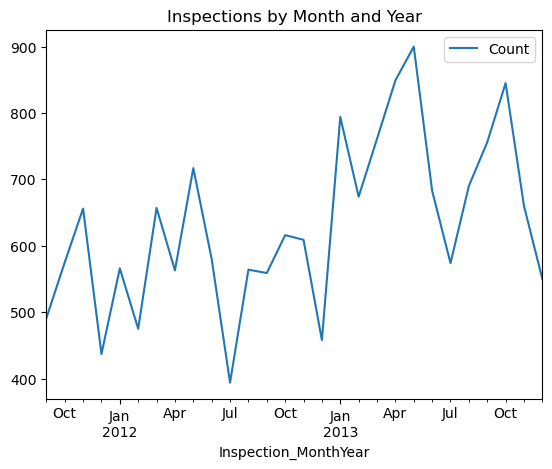

In [19]:
# visualize inspections over time
# -----------
chicago_inspections_2011_to_2013['Inspection_MonthYear'] = chicago_inspections_2011_to_2013['Inspection_Date'].dt.to_period('M')
counts_by_day = chicago_inspections_2011_to_2013.groupby('Inspection_MonthYear').count().rename(columns = {'Facility_Type': 'Count'})['Count'].reset_index()
counts_by_day.set_index(["Inspection_MonthYear"], inplace = True)
counts_by_day.plot(title = "Inspections by Month and Year") 

Let's visualize what the distribution of results looks like.

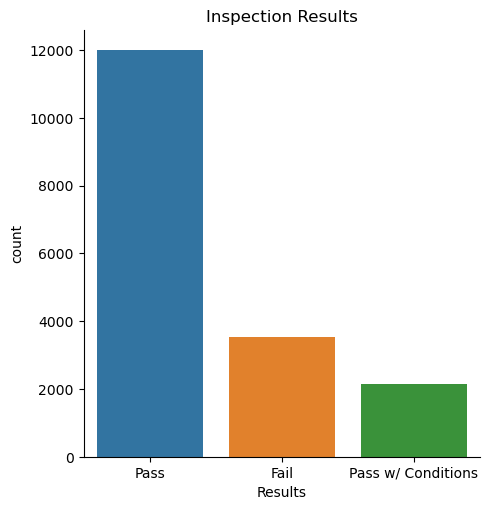

In [20]:
# view inspection results
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count")

plt.title("Inspection Results")
plt.show()

What if we separate results by facility type?

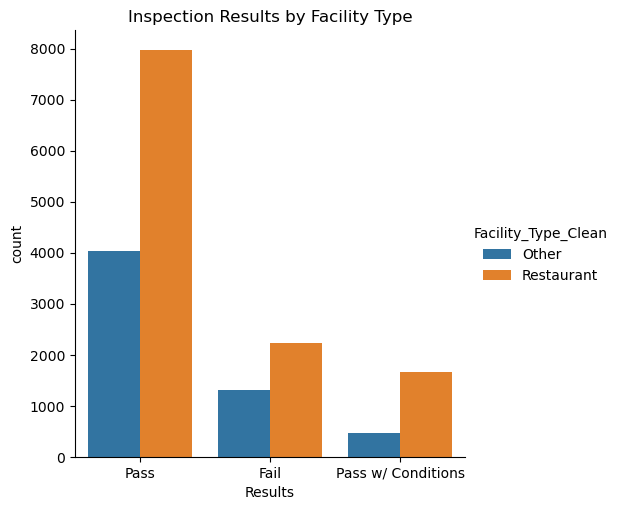

In [21]:
# view inspection results by facility type (restaurant or not)
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
            x = "Results",
            kind = "count",
            hue = 'Facility_Type_Clean')

plt.title("Inspection Results by Facility Type")
plt.show();

## 2. Data Preprocessing and Cleaning

In [22]:
# drop datetime info
# -----------
chicago_inspections_2011_to_2013 = chicago_inspections_2011_to_2013.dropna().drop(['Inspection_Date',
                                                                                   'minDate',
                                                                                   'maxDate',
                                                                                   'Inspection_MonthYear'],
                                                                                  axis = 1)

In [23]:
# process target 
# -----------
y = chicago_inspections_2011_to_2013['Results']

# decide if you want to binarize the outcome variable 
# -----------
# comment out the following lines of code if you don't want to binarize the target variable
y = y.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y = lb_style.fit_transform(y)

# recode 0s and 1s so 1s are "Fail"
y = np.where(y == 1, 0 ,1)


# process features
# -----------

# create feature dataset
X = chicago_inspections_2011_to_2013.drop(columns = ['Results', 
                                                                                            'Facility_Type', 
                                                                                            'LICENSE_DESCRIPTION', 
                                                                                            'WARD_PRECINCT'])


# get dummies
X = pd.get_dummies(X)

In [24]:
# view feature datset
X.head()

,,criticalCount,seriousCount,minorCount,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,POLICE_DISTRICT,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound,Risk_Risk 1 (High),Risk_Risk 2 (Medium),Risk_Risk 3 (Low),Inspection_Type_Canvass,Facility_Type_Clean_Other,Facility_Type_Clean_Restaurant,APPLICATION_TYPE_C_EXPA,APPLICATION_TYPE_C_LOC,APPLICATION_TYPE_ISSUE,APPLICATION_TYPE_RENEW
Inspection_ID,DBA_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
269961,SEVEN STAR,0,0,2,0,0,0,0,2.0,1,19.0,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0,0,0,1,1,1,0,0,0,0,1
507211,PANERA BREAD,0,0,3,0,0,0,0,2.0,1,24.0,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0,1,0,0,1,0,1,0,0,0,1
507212,LITTLE QUIAPO RESTAURANT,0,2,6,0,0,0,0,2.0,1,17.0,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0,1,0,0,1,0,1,0,0,0,1
507216,SERGIO'S TAQUERIA PIZZA INC.,0,0,6,0,0,0,0,2.0,1,17.0,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0,1,0,0,1,0,1,0,0,0,1
507219,TARGET STORE # T-2079,0,2,6,0,0,0,0,2.0,1,24.0,5.290411,0,0,1,0,0,1,0,0,0,0,0,0,0.009987,52.730000,16.266667,0.690000,9.530785,3.401567,2.126788,0,0,1,0,1,0,1,0,0,0,1


## 3. Fit Models

Now choose 3 different machine learning techniques and apply them below. Choose from one of the algorithms we have used in lab (e.g., logistic regression, random forests, `AdaBoost()`, `xgboost()`, `VotingClassifer()`, or `BART`). 

Detail the basic logic and assumptions underlying each model, its pros/cons, and why it is a plausible choice for this problem. Also, be sure to do the following:

1. Import the appropriate library from sklearn
2. Set up a hyperparameter grid (check out our previous labs to see how to do this)
3. Find the best hyperparameters, and then fit your model (using either train/validation splits or cross-validation)

### Model 1 - Random Forest

A Random Forest is an ensemble model that belongs to the bagging class of models. It extends the idea of decision tree, to grow several trees each one with a different subset of features.
The algorithm then does a voting over each tree's prediction to choose the best tree to determine a winner. The parameters can be tunned with cross-validation. 

In [25]:
# initialize a random forest classifier
# ----------
rf_classifier = RandomForestClassifier(
                       # specify parameters
                       n_estimators=100,              # specify the number of trees (100 is default)
                       criterion='gini',              # or you can use 'entropy' for information gain
                       max_depth=None,                # how deep tree nodes can go
                       min_samples_split=2,           # samples needed to split node
                       min_samples_leaf=1,            # samples needed for a leaf
                       min_weight_fraction_leaf=0.0,  # weight of samples needed for a node
                       max_features=None,             # number of features to look for when splitting
                       max_leaf_nodes=None,           # max nodes
                       min_impurity_decrease=1e-07,   # early stopping
                       random_state = 10)             # random seed

In [26]:
# specify cross-validation
# ----------
scores = cross_val_score(rf_classifier, 
                         X, 
                         y.ravel(), # Some algorithms will expect you to ravel the target
                         cv=5)

In [27]:
# calculate the average score across models
# ----------
scores.mean()

# Features will be showen in the next section. 

0.9216250168196589

###  Model 2 - XgBoost

XgBoost is also an ensemble model that uses other models as decision trees to make predictions and then decide which one is better. The main difference, is that this model is sequential, so each next model tries to correct the errors made by the previous one.  XGBoost includes additional regularization techniques to prevent overfitting. It is also more quick as it uses parallel processing. It is also able to handle missing values. 

In [28]:
# initialize an XGBoost classifier
# ----------
xgb_classifier = xgb.XGBClassifier(random_state=10)


# define the scoring metrics
scoring = {
          'accuracy': make_scorer(accuracy_score),
          'recall': make_scorer(recall_score),
          'precision': make_scorer(precision_score),
          'f1': make_scorer(f1_score)
          }


# perform cross-validation with 5-fold and return the trained estimators
cv_results = cross_validate(xgb_classifier,        # specify estimator 
                            X,                     # specify features
                            y.ravel(),             # specify outcome, and use ravel
                            cv=5,                  # specify 5-fold cross validation
                            return_estimator=True, # return the estimators fitted at each split
                            scoring=scoring)       # which scoring metrics to return (the whole list in this case)
 
# print the results for accuracy, recall, precision, and F1 score
for metric in ['test_accuracy', 'test_recall', 'test_precision', 'test_f1']:
    scores = cv_results[metric]
    print(f"{metric[5:]}: {scores.mean():.3f}")


accuracy: 0.918
recall: 0.835
precision: 0.777
f1: 0.805


### Model  - Voting Classifier 

A voting classifier is, as the name suggest, a voting algorithm, similar to a random forest. The difference is that it takes a majority vote of various algorithms instead of trees.
The voting can be "hard" which means the ensemble uses a majority vote of predicted classes, or "soft" meaning the votes are weighted by the probability associated with the prediction. For this case I'll use a soft one, so we can estimate the probabilities. 

In [69]:
# specify voting classifiers
# ----------
# Logistic Regression - using liblinear solver
# ----------
log_reg = LogisticRegression(random_state = 10, 
                             solver='liblinear')

# Random Forest
# ----------
rf_classifier = RandomForestClassifier(
                       criterion='gini',              # you can also use 'entropy' for information gain
                       max_depth=None,                # how deep tree nodes can go
                       min_samples_split=2,           # samples needed to split node
                       min_samples_leaf=1,            # samples needed for a leaf
                       min_weight_fraction_leaf=0.0,  # weight of samples needed for a node
                       max_features=None,             # number of features to look for when splitting
                       max_leaf_nodes=None,           # max nodes
                       min_impurity_decrease=1e-07,   # early stopping
                       random_state = 10)             # random seed

# AdaBoost
# ----------
ada_classifier = AdaBoostClassifier(n_estimators=100)

# XGBoost
# ----------
xgb_classifier = xgb.XGBClassifier(random_state=10)

# specify voting classifiers
# ----------
voting_classifier = VotingClassifier(
                        # specify estimators to use
                        estimators = [('lr', log_reg),
                                     ('rf', rf_classifier),
                                     ('ada', ada_classifier),
                                     ('xgb', xgb_classifier)],
                        # specify voting
                        voting = 'soft')

# loop through each model to report accuracy
# ----------
for clf, label in zip([log_reg, 
                       rf_classifier, 
                       ada_classifier, 
                       xgb_classifier,
                       voting_classifier], ['Logistic Regression', 
                                            'Random Forest', 
                                            'Ada Boost',
                                            'XGBoost',
                                            'Ensemble']):
         scores = cross_val_score(clf, 
                                  X, 
                                  y.ravel(),
                                  scoring='accuracy', 
                                  cv=5)
         print('Accuracy: %0.2f [%s]' % (scores.mean(), label))

Accuracy: 0.92 [Logistic Regression]
Accuracy: 0.92 [Random Forest]
Accuracy: 0.91 [Ada Boost]
Accuracy: 0.92 [XGBoost]
Accuracy: 0.92 [Ensemble]


### Validation Metrics

Be sure to explain which of these metrics you would want to prioritize when conducting predictive auditing in this context and why.

**Hint**: Try writing a for loop to use [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) to check for accuracy, precision, recall and f1 across all of your models.

For the case in hand, we not only care about the accuracy which is how many true positives we have, but also is important to see the effect of wrongly identifying places that won't need an audit, this would imply a waste of resource and a potential disconfort of owners that didn't needed the audit.For that reason I woudl prioritize the F1 metric, which looks for a balance of the recall and precision, and it is more recommended when there is a high cost of missclasification in both categories. Also, as seen in the data, there is an imbalance, much more cases pass than fail an audit, which also reassures the use of F1, as it is more precise for this type of data distribution.  All models seem to have a similar accuracy score, nonetheless, the F1 score is higher for the random forest model and my voting classifier, which makes sense.  

In [70]:
# loop through each model to report accuracy
# ----------
for clf, label in zip([rf_classifier,
                       xgb_classifier,
                       voting_classifier], ['Random Forest', 
                                            'XGBoost',
                                            'Ensemble']):
         scores = cross_val_score(clf, 
                                  X, 
                                  y.ravel(),
                                  scoring='accuracy', 
                                  cv=5)
               
         print('Accuracy: %0.2f [%s]' % (scores.mean(), label))
        
         scores = cross_val_score(clf, 
                                  X, 
                                  y.ravel(),
                                  scoring='precision', 
                                  cv=5)
         print('Precision: %0.2f [%s]' % (scores.mean(), label))
        
         scores = cross_val_score(clf, 
                                  X, 
                                  y.ravel(),
                                  scoring='recall', 
                                  cv=5)
         print('Reacall: %0.2f [%s]' % (scores.mean(), label))            
        
         scores = cross_val_score(clf, 
                                  X, 
                                  y.ravel(),
                                  scoring='f1', 
                                  cv=5)
         print('F1: %0.2f [%s]' % (scores.mean(), label))   
            

Accuracy: 0.92 [Random Forest]
Precision: 0.77 [Random Forest]
Reacall: 0.87 [Random Forest]
F1: 0.82 [Random Forest]
Accuracy: 0.92 [XGBoost]
Precision: 0.78 [XGBoost]
Reacall: 0.84 [XGBoost]
F1: 0.80 [XGBoost]
Accuracy: 0.92 [Ensemble]
Precision: 0.78 [Ensemble]
Reacall: 0.87 [Ensemble]
F1: 0.82 [Ensemble]


## 4. Policy Simulation

### Interpretable Machine Learning

Use tools like coefficient plots or feature importance plots to investigate your models. Which features contribute to your predictions? Are there any additional features you wish you could incorporate that you don't have available in this analysis?

**Hint**: Use tools like feature importance plots and coefficient plots.

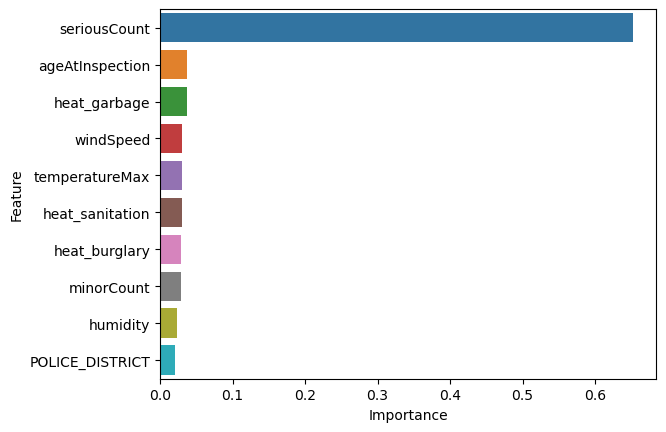

In [31]:
# fit the random forest on data to get feature importance
# ----------
rf_classifier.fit(X, y.ravel())

# import library
import seaborn as sns

# create feature importance dataframe
feat_importances = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(rf_classifier.feature_importances_))], axis = 1)
feat_importances.columns = ["Feature", "Importance"]

# plot 
sns.barplot(x = "Importance", 
            y = "Feature", 
            data = feat_importances.nlargest(10, 'Importance')) # identify the 10 most important features
plt.show()



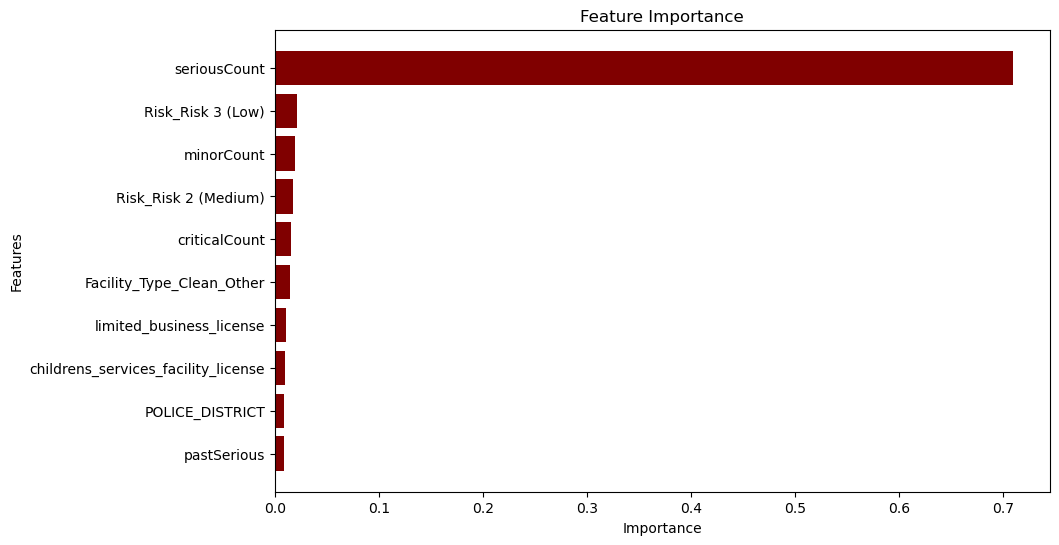

In [27]:
# Let's look at the feature importance
# ----------

# Initialize an array to hold the feature importances
importances = np.zeros(X.shape[1])

# Average the feature importances over the folds
for estimator in cv_results['estimator']:
    importances += estimator.feature_importances_
    
# Divide by the number of folds
importances /= 5  

# Create a DataFrame for visualization
feature_importance = pd.DataFrame({'feature': X.columns, 
                                   'importance': importances})

# Sort the features by importance
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Take the top 10 features
feature_importance = feature_importance.head(10)

# Plot the feature importances
plt.figure(figsize=(10, 6))

# horizontal bar plot
plt.barh(feature_importance['feature'], 
         feature_importance['importance'], 
         color='maroon', 
         align='center')

# labels
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')

# gca stands for "get current axis", which allows you to modify the properties of the axes.
# and then inverts the y-axis, meaning that the values that were at the bottom will now be at the top, and vice versa.
plt.gca().invert_yaxis() 
plt.show()

In [ ]:
#The voting classifier will share the same importance features than the other models but weighted. 


It seems that the most important feature is seriousCount, which is a count of serious events or mistakes counted in the audit. This makes sense as this is directly related to the result of passing or not.  Not sure if this variable will be available beforehand to decide what places need the audit, or if it will based on data from the last year. 

### Prioritize Audits

**Hint**: Look up the [`.predict()`](https://www.kite.com/python/docs/sklearn.linear_model.SGDRegressor.predict), [`.predict_proba()`](https://www.kite.com/python/docs/sklearn.linear_model.LogisticRegression.predict_proba), and [`.sample()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) methods. Then: 
1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities. 
2. Order your audits by their probability of detecting a "Fail" score
3. Plot your distribution of pass/fail among the first 1,000 observations in the dataset
4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random

In [32]:
#
# 1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities.
# -----------

# specify voting classifiers
# ----------
voting_classifier = VotingClassifier(
                        # specify estimators to use
                        estimators = [('rf', rf_classifier),
                                     ('xgb', xgb_classifier)],
                        # specify voting
                        voting = 'soft')
# fit each classifer "c" to the data, predict the probability of tha clasifer and store as "probas"
probas = [c.fit(X, y.ravel()).predict_proba(X)[:,1] for c in (rf_classifier,
                                                              xgb_classifier,
                                                              voting_classifier)]



In [33]:
# create a dataset from the predicted probabilities
# ----------
probs_df = pd.DataFrame.from_records(probas).T # pulls the list of "probas" and stores as dataframe
probs_df.rename(columns = {0: 'rf',
                           1: 'xgb',
                           2: 'ensemble'
                          }, 
                inplace = True)

# view the first few observations
# ----------
probs_df.head(10)

,rf,xgb,ensemble
0,0.00,0.000204,0.000102
1,0.00,0.000152,0.000076
2,0.98,0.924518,0.952259
3,0.00,0.001164,0.000582
4,0.88,0.958368,0.919184
5,0.92,0.957425,0.938713
6,0.00,0.000181,0.000090
7,0.00,0.000056,0.000028
8,0.00,0.000020,0.000010
9,0.00,0.000091,0.000045


In [34]:
#
# 2. Order your audits by their probability of detecting a "Fail" score
# -----------
sorted_probs_df = probs_df.sort_values(by='ensemble', ascending = False)

sorted_probs_df.head(20)


,rf,xgb,ensemble
2756,1.0,0.999912,0.999956
13303,1.0,0.999906,0.999953
672,1.0,0.999901,0.999951
9000,1.0,0.999867,0.999933
9484,1.0,0.999849,0.999924
13367,1.0,0.999845,0.999923
7218,1.0,0.999839,0.999919
14840,1.0,0.999810,0.999905
7210,1.0,0.999782,0.999891
587,1.0,0.999754,0.999877


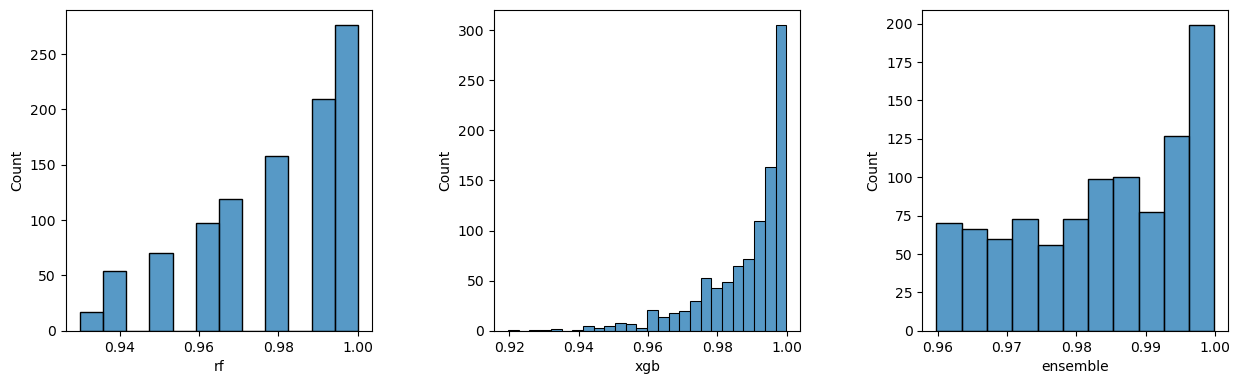

In [35]:
#
# 3. Plot your distribution of pass/fail among the first 1,000 observations in the dataset
# -----------
# visualize distributions
# ----------

subset_probs_df = sorted_probs_df.iloc[:1000]

# set figure parameters
fig = plt.figure(figsize=(15, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# random forest
ax = fig.add_subplot(2, 3, 1)
sns.histplot(subset_probs_df, x="rf", ax=ax)

# xgboost
ax = fig.add_subplot(2, 3, 2)
sns.histplot(subset_probs_df, x="xgb", ax=ax)

# ensemble
ax = fig.add_subplot(2, 3, 3)
sns.histplot(subset_probs_df, x="ensemble", ax=ax)

# show plot 
plt.show()


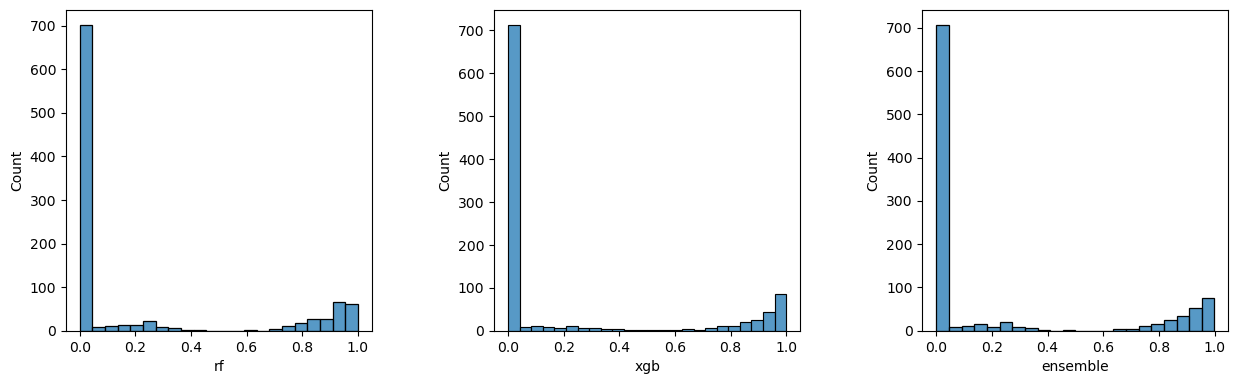

In [36]:
#
# 4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random
# -----------

sample_probs_df = sorted_probs_df.sample(n=1000, random_state=159)

# set figure parameters
fig = plt.figure(figsize=(15, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# random forest
ax = fig.add_subplot(2, 3, 1)
sns.histplot(sample_probs_df, x="rf", ax=ax)

# xgboost
ax = fig.add_subplot(2, 3, 2)
sns.histplot(sample_probs_df, x="xgb", ax=ax)

# ensemble
ax = fig.add_subplot(2, 3, 3)
sns.histplot(sample_probs_df, x="ensemble", ax=ax)

# show plot 
plt.show()


### Predict on 2014 inspection data

Use your favorite model to make predictions based on the features using the "Chicago Inspection 2014_updated.csv" file. Treat this as you would a test dataset. This means you will have to format the features (including removing some features and getting dummies) and the label (binarize and recode) in the same way you did the training data. (Remember the "Results" column is your label). You will then compare your predictions with the actual.

In [47]:
chicago_inspections_2014 = pd.read_csv("data/Chicago Inspections 2014_updated.csv",  # be sure to use the "updated" data here
                                      low_memory=False)

In [48]:
chicago_inspections_2014.drop(columns = ['AKA_Name', 
                                                 'License',
                                                 'Address',
                                                 'City',
                                                 'State',
                                                 'Zip',
                                                 'Latitude',
                                                 'Longitude',
                                                 'Location',
                                                 'ID',
                                                 'LICENSE_ID',
                                                 'LICENSE_TERM_START_DATE',
                                                 'LICENSE_TERM_EXPIRATION_DATE',
                                                 'LICENSE_STATUS',
                                                 'ACCOUNT_NUMBER',
                                                 'LEGAL_NAME',
                                                 'DOING_BUSINESS_AS_NAME',
                                                 'ADDRESS',
                                                 'CITY',
                                                 'STATE',
                                                 'ZIP_CODE',
                                                 'WARD',
                                                 'PRECINCT',
                                                 'LICENSE_CODE',
                                                 'BUSINESS_ACTIVITY_ID',
                                                 'BUSINESS_ACTIVITY',
                                                 'LICENSE_NUMBER',
                                                 'LATITUDE',
                                                 'LONGITUDE'],
                                     inplace = True)

# set index
chicago_inspections_2014.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

In [49]:
chicago_inspections_2014['Inspection_Date'] = pd.to_datetime(chicago_inspections_2014['Inspection_Date'])  

In [50]:
chicago_inspections_2014.head(10)

,,Inspection_Date,Facility_Type,Risk,Inspection_Type,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_DESCRIPTION,APPLICATION_TYPE,minDate,maxDate,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound,Results
Inspection_ID,DBA_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
920444,GALLISTEL LANGUAGE ACADEMY,2014-01-15,School,Risk 1 (High),Canvass,Other,0,1,5,0,0,0,2,0.964384,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,41.670000,13.533333,0.726667,2.149376,7.705332,9.535848,0,Fail
920445,SUBWAY,2014-02-03,Restaurant,Risk 1 (High),Canvass,Restaurant,2,0,0,0,0,0,0,0.794521,0,10-38,4.0,Retail Food Establishment,ISSUE,2012-08-29,2018-09-15,1.432877,0,0,0,0,0,0,0,0,0,0,0,0,0.002300,28.160000,6.020000,0.746667,12.034833,7.194320,1.219222,1,Pass w/ Conditions
920446,SHARKS FISH & CHICKEN,2014-02-03,Restaurant,Risk 2 (Medium),Canvass,Restaurant,0,0,6,0,0,0,2,0.660274,0,7-49,4.0,Retail Food Establishment,RENEW,2004-03-02,2018-07-15,9.931507,0,0,0,0,0,0,0,0,0,0,0,0,0.002300,28.160000,6.020000,0.746667,26.292725,27.837325,12.401466,0,Pass
920448,P K PETRO INC.,2014-03-07,Grocery Store,Risk 3 (Low),Canvass,Other,0,1,7,0,0,0,0,2.000000,1,5-21,3.0,Retail Food Establishment,RENEW,2003-03-05,2018-12-15,11.013699,0,1,0,0,0,0,0,0,0,1,0,0,0.000433,25.300000,7.653333,0.636667,49.468944,11.282325,66.467028,0,Fail
920449,"Z T DOLLAR EXCHANGE,INC",2014-03-07,Grocery Store,Risk 3 (Low),Canvass,Other,1,2,5,0,0,0,0,2.000000,1,7-40,3.0,Retail Food Establishment,ISSUE,2012-10-09,2018-12-15,1.408219,0,1,0,0,0,1,0,0,0,0,0,0,0.000433,25.300000,7.653333,0.636667,69.939833,26.695701,76.827119,1,Fail
920450,KENNEDY FISH & CHICKEN,2014-03-07,Restaurant,Risk 1 (High),Canvass,Restaurant,0,1,7,0,0,0,3,0.964384,0,7-40,3.0,Retail Food Establishment,RENEW,2010-11-17,2018-12-15,3.304110,0,0,0,0,0,0,0,0,0,0,0,0,0.000433,25.300000,7.653333,0.636667,69.662066,27.638311,78.175677,0,Fail
920453,John L. Marsh Elementary,2014-04-02,School,Risk 1 (High),Canvass,Other,0,0,4,0,0,0,2,0.945205,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0.000200,57.453333,12.513333,0.510000,7.192253,9.551933,6.093816,0,Pass
920471,THE UNIT,2014-09-11,Grocery Store,Risk 2 (Medium),Canvass,Other,0,1,8,0,0,0,0,2.000000,1,7-39,4.0,Retail Food Establishment,RENEW,2010-03-19,2018-12-15,4.484932,0,0,0,0,0,0,0,0,0,0,0,0,0.010067,77.946667,8.373333,0.693333,105.572009,18.826366,44.398934,0,Fail
920476,SOUTH SHORE INTERNATIONAL COLLEGE PREP,2014-10-08,School,Risk 1 (High),Canvass,Other,0,1,6,1,0,1,2,0.945205,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0.000167,60.293333,10.413333,0.623333,18.011227,26.367795,27.836680,0,Fail


In [51]:
# drop datetime info
# -----------
chicago_inspections_2014 = chicago_inspections_2014.dropna().drop(['Inspection_Date','minDate', 'maxDate' ],
                                                                                  axis = 1)

In [52]:
chicago_inspections_2014.head(10)

,,Facility_Type,Risk,Inspection_Type,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_DESCRIPTION,APPLICATION_TYPE,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound,Results
Inspection_ID,DBA_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
920445,SUBWAY,Restaurant,Risk 1 (High),Canvass,Restaurant,2,0,0,0,0,0,0,0.794521,0,10-38,4.0,Retail Food Establishment,ISSUE,1.432877,0,0,0,0,0,0,0,0,0,0,0,0,0.002300,28.160000,6.020000,0.746667,12.034833,7.194320,1.219222,1,Pass w/ Conditions
920446,SHARKS FISH & CHICKEN,Restaurant,Risk 2 (Medium),Canvass,Restaurant,0,0,6,0,0,0,2,0.660274,0,7-49,4.0,Retail Food Establishment,RENEW,9.931507,0,0,0,0,0,0,0,0,0,0,0,0,0.002300,28.160000,6.020000,0.746667,26.292725,27.837325,12.401466,0,Pass
920448,P K PETRO INC.,Grocery Store,Risk 3 (Low),Canvass,Other,0,1,7,0,0,0,0,2.000000,1,5-21,3.0,Retail Food Establishment,RENEW,11.013699,0,1,0,0,0,0,0,0,0,1,0,0,0.000433,25.300000,7.653333,0.636667,49.468944,11.282325,66.467028,0,Fail
920449,"Z T DOLLAR EXCHANGE,INC",Grocery Store,Risk 3 (Low),Canvass,Other,1,2,5,0,0,0,0,2.000000,1,7-40,3.0,Retail Food Establishment,ISSUE,1.408219,0,1,0,0,0,1,0,0,0,0,0,0,0.000433,25.300000,7.653333,0.636667,69.939833,26.695701,76.827119,1,Fail
920450,KENNEDY FISH & CHICKEN,Restaurant,Risk 1 (High),Canvass,Restaurant,0,1,7,0,0,0,3,0.964384,0,7-40,3.0,Retail Food Establishment,RENEW,3.304110,0,0,0,0,0,0,0,0,0,0,0,0,0.000433,25.300000,7.653333,0.636667,69.662066,27.638311,78.175677,0,Fail
920471,THE UNIT,Grocery Store,Risk 2 (Medium),Canvass,Other,0,1,8,0,0,0,0,2.000000,1,7-39,4.0,Retail Food Establishment,RENEW,4.484932,0,0,0,0,0,0,0,0,0,0,0,0,0.010067,77.946667,8.373333,0.693333,105.572009,18.826366,44.398934,0,Fail
1072715,STARBUCKS COFFEE #2229,Restaurant,Risk 2 (Medium),Canvass,Restaurant,0,0,3,0,0,0,3,1.000000,0,42-49,1.0,Retail Food Establishment,RENEW,11.660274,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,6.013333,11.800000,0.650000,18.279236,0.078497,7.435346,0,Pass
1072716,THE WESTMINSTER HOT DOG,Restaurant,Risk 1 (High),Canvass,Restaurant,1,0,4,0,0,0,4,0.926027,0,42-9,1.0,Retail Food Establishment,RENEW,2.989041,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,6.013333,11.800000,0.650000,18.313415,0.019499,4.303583,1,Fail
1072717,SUBWAY #44541,Restaurant,Risk 1 (High),Canvass,Restaurant,0,0,1,0,0,0,2,0.750685,0,42-49,1.0,Retail Food Establishment,RENEW,4.756164,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,15.400000,7.193333,0.716667,22.116844,0.075164,6.430316,0,Pass


In [54]:
# data processing
# -----------

# process features
X_test2014 = chicago_inspections_2014.drop(columns = ['Results',  'Facility_Type', 
                                                                             'LICENSE_DESCRIPTION', 
                                                                                'WARD_PRECINCT'])

# get dummies
X_test2014 = pd.get_dummies(X_test2014)

# process target 
y_test2014 = chicago_inspections_2014['Results']

y_test2014 = y_test2014.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y_test2014 = lb_style.fit_transform(y_test2014)

# recode 0s and 1s so 1s are "Fail"
y_test2014 = np.where(y_test2014 == 1, 0 ,1)


In [55]:
# predict and compare 
# -----------

# prediction to test data
y_pred_test = voting_classifier.predict(X_test2014)





In [64]:
probs14_df = pd.DataFrame(y_pred_test) # pulls the list of "probas" and stores as dataframe


# view the first few observations
# ----------
probs14_df.head(10)

,0
0,0
1,0
2,1
3,1
4,1
5,1
6,0
7,0
8,0
9,0


In [67]:
sorted_probs14_df = probs14_df.sort_values(by=0, ascending = False)

sorted_probs14_df.head(20)

,0
3372,1
2591,1
1656,1
2595,1
832,1
3238,1
830,1
1659,1
1665,1
747,1


In [56]:
# set each object to 0 to start
TP = 0
FP = 0
TN = 0
FN = 0

# loop over each observation to assign to TP, FP, TN, and FN
for i in range(len(y_pred_test)): 
    if y_test2014[i]==y_pred_test[i]==1:
        TP += 1
    if y_pred_test[i]==1 and y_test2014[i]==0:
        FP += 1
    if y_test2014[i]==y_pred_test[i]==0:
        TN += 1
    if y_pred_test[i]==0 and y_pred_test[i]!=y_test2014[i]:
        FN += 1

In [59]:
# calculate accuracy based on the formula defined above
accuracy = (TP + TN)/(TP + TN + FP + FN)
print("Accuracy is", accuracy)
# calculate precision based on the formula defined above
precision = TP/(TP + FP)
print("Precision is", precision)
# calculate recall based on the formula defined above
recall = TP/(TP + FN)
print("Recall is", recall)
# calculate the F1 score based on the formula defined above
f1 = 2 * (precision * recall)/(precision + recall)
print("F1 Score is", f1)

Accuracy is 0.9009398018796038
Precision is 0.7233560090702947
Recall is 0.8137755102040817
F1 Score is 0.7659063625450181


In [71]:
# evaluate
# ---------
# The results are as usual a little bit less precise with the test data. Overall, the F1 score is 0.77 which is lower than the first ones. 

The results are as usual a little bit less precise with the test data. Overall, the F1 score is 0.77 which is lower than the first ones. 

## 5. Discussion Questions

1. Why do we need metrics beyond accuracy when using machine learning in the social sciences and public policy?


**YOUR ANSWER HERE**...
In many cases we are also concerned about the "cost" of missclassifying cases in both categories, as we discussed in class. For instance in this case, limited resources used to audit cases where the probability is low to fail instead os using them to catch those that are more probable call for not only assessing the accuracy. Similarly, in the high stake cases like risk to get incarcerated, or predict recividism, a mistake on both sides have terrible consequences. As this is not a case on recommending a movie or a product, we also want to take into account the ethical implications of false negatives. This is particularly important for imbalanced outcomes, where the algorithms could overpredict, but still be very accurate.  

2. Imagine that establishments learned about the algorithm being used to determine who gets audited and they started adjusting their behavior (and changing certain key features about themselves that were important for the prediction) to avoid detection. How could policymakers address this interplay between algorithmic decisionmaking and real world behavior?

**YOUR ANSWER HERE**...
First, the algorithm would need to be adjusted to those changes, so simulations can be done to understand this scenarios and have models that perform well even when omiting important variables. Updating the model constantly should be a good way to avoid quick adjustments by businesses. Other option would be to add elements of surprise and randomness, in a way that it seems like the models it not the only tool used to determine who needs the audit. Overall, the over-relience on obvious components is alreay evident, so the detail might be on features that don't seem too obvious, which I suspect might also have a low impact on the prediction. So changing the model from time to time without too much sacrifice on performance might be possible. Then again balancing the tradeoffs in the long term shoudl be the criteria to make this decision. 

